File to be called for necessary cleaning of data for a particular csv file

In [36]:
# Packages module Code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score  #Scikit Learn
import os
import random
import argparse
import requests
from tqdm import tqdm  #tqdm is used for progress bar
import json

In [37]:
#Global variable
raw_data=0
filename='file1.csv'

In [38]:
# Taking command line input of the file on which EDA to be done
def read_file(s):
    return pd.read_csv(s, sep=',')
# Json method of taking input
""""
# Load the arguments
with open('arguments.json', 'r') as fid:
    arguments = json.load(fid)
# Do the work
raw_data=read_file(arguments['filename'])
"""
raw_data=read_file('file1.csv')
raw_data


,ENGINE_ID,CONDITION_ID,Cycle_Time,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,1,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,1,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,1,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,1,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [39]:
raw_data.info()
# check how many original turbofan engine series we have
len(raw_data['ENGINE_ID'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENGINE_ID        20631 non-null  int64  
 1   CONDITION_ID     20631 non-null  int64  
 2   Cycle_Time       20631 non-null  int64  
 3   OpSet1           20631 non-null  float64
 4   OpSet2           20631 non-null  float64
 5   OpSet3           20631 non-null  float64
 6   SensorMeasure1   20631 non-null  float64
 7   SensorMeasure2   20631 non-null  float64
 8   SensorMeasure3   20631 non-null  float64
 9   SensorMeasure4   20631 non-null  float64
 10  SensorMeasure5   20631 non-null  float64
 11  SensorMeasure6   20631 non-null  float64
 12  SensorMeasure7   20631 non-null  float64
 13  SensorMeasure8   20631 non-null  float64
 14  SensorMeasure9   20631 non-null  float64
 15  SensorMeasure10  20631 non-null  float64
 16  SensorMeasure11  20631 non-null  float64
 17  SensorMeasur

100

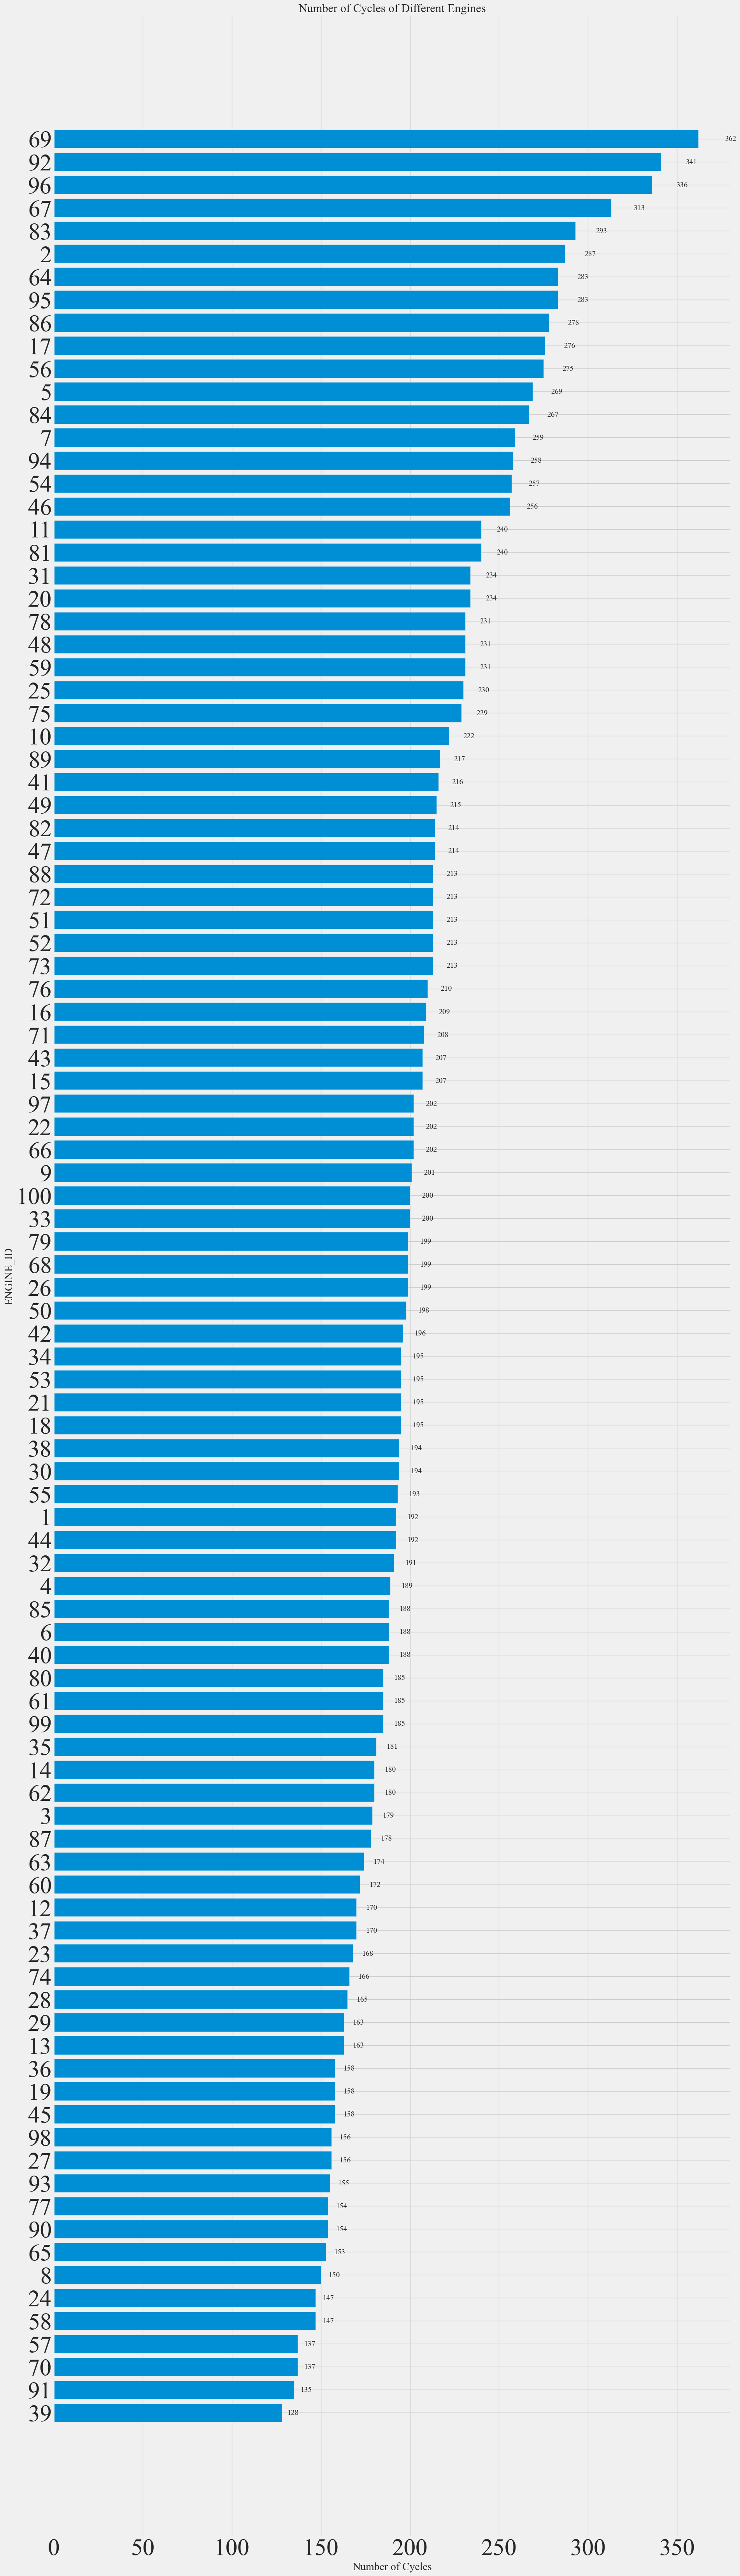

In [40]:
#Plot Engine ID and cycle Time
cnt_train=raw_data[['ENGINE_ID', 'Cycle_Time']].groupby('ENGINE_ID').max().sort_values(by='Cycle_Time', ascending=True)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.Cycle_Time.values)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(20, 80))
rects = ax.barh(cnt_ind, cnt_val)
ax.set_title("Number of Cycles of Different Engines", fontsize=22)
ax.set_ylabel('ENGINE_ID', fontsize=20)
ax.set_xlabel("Number of Cycles", fontsize=20)
ax.grid(True)

for rect in rects:
    width = rect.get_width()
    plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
             '%d' % int(width),
             ha='center', va='center')


In [41]:
# Remove sensors with empty sensor values
cols_nan = raw_data.columns[raw_data.isna().any()].tolist()  
#.tolist() is used to convert data elements in array
#isna() Checks for any values and  .any() returns a boolean value
print('Columns without data: \n' + str(cols_nan) + '\n')

train_data = raw_data.drop(columns=cols_nan)

Columns without data: 
[]



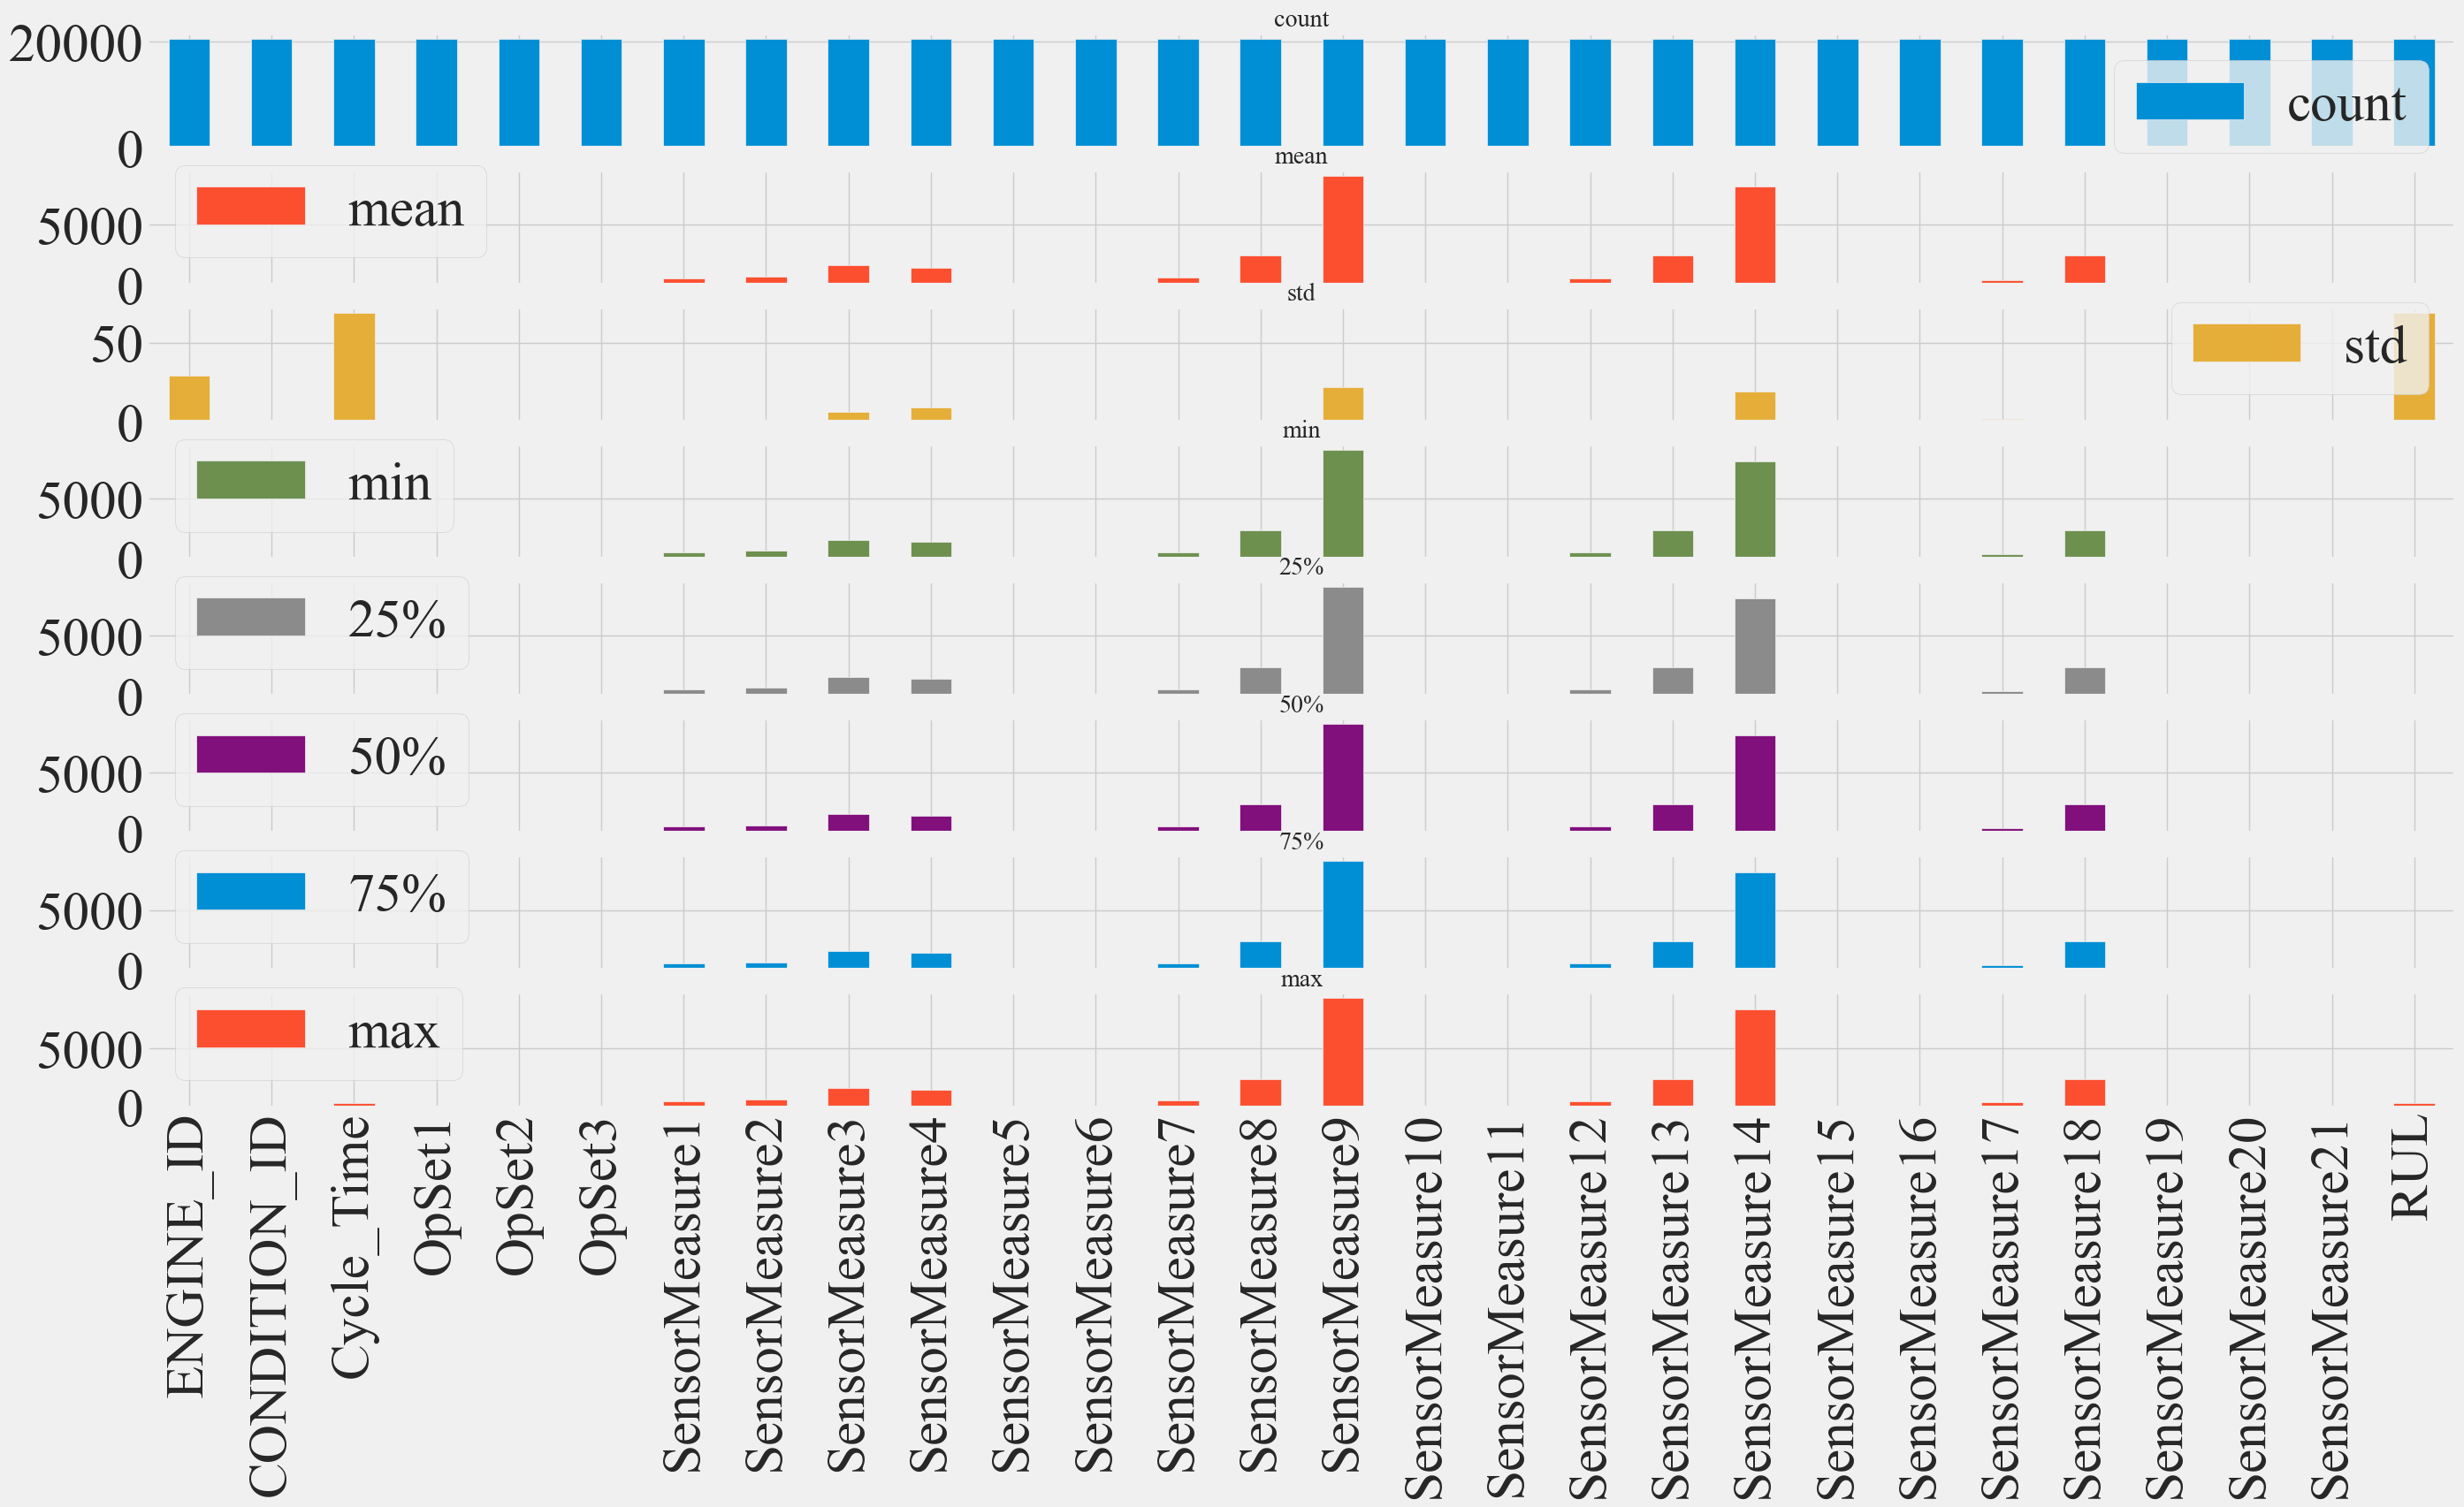

In [42]:
# define column sets for the analysis
info_cols = ['ENGINE_ID', 'Cycle_Time', 'RUL','CONDITION_ID']
operational_cols = ['OpSet{}'.format(i + 1) for i in range (3)]
sensor_cols = ['SensorMeasure{}'.format(i + 1) for i in range(21)]

# plot an overview of whats going on in the columns
axes = train_data.describe().T.plot.bar(subplots=True, figsize=(30,15))

#raw_data.describe()

In [43]:
#Columns to be dropped based on STD and uniqueness
cols_const = [ col for col in raw_data.columns if len(raw_data[col].unique()) <= 2 ]  # searching for unique columns
print('Columns with constant values: \n' + str(cols_const) + '\n')

Columns with constant values: 
['CONDITION_ID', 'OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']



In [44]:
#Drop columns
raw_data=raw_data.drop(cols_const,axis=1)
raw_data

,ENGINE_ID,Cycle_Time,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [45]:
#Updating operational cols and sensor cols as some cols have been dropped
for i in cols_const:
    if i in operational_cols:
         operational_cols.remove(i)
    elif i in sensor_cols:
        sensor_cols.remove(i)
    else:
        info_cols.remove(i)

[Text(0, 0.5, 'ENGINE_ID'),
 Text(0, 1.5, 'Cycle_Time'),
 Text(0, 2.5, 'OpSet1'),
 Text(0, 3.5, 'OpSet2'),
 Text(0, 4.5, 'SensorMeasure2'),
 Text(0, 5.5, 'SensorMeasure3'),
 Text(0, 6.5, 'SensorMeasure4'),
 Text(0, 7.5, 'SensorMeasure7'),
 Text(0, 8.5, 'SensorMeasure8'),
 Text(0, 9.5, 'SensorMeasure9'),
 Text(0, 10.5, 'SensorMeasure11'),
 Text(0, 11.5, 'SensorMeasure12'),
 Text(0, 12.5, 'SensorMeasure13'),
 Text(0, 13.5, 'SensorMeasure14'),
 Text(0, 14.5, 'SensorMeasure15'),
 Text(0, 15.5, 'SensorMeasure17'),
 Text(0, 16.5, 'SensorMeasure20'),
 Text(0, 17.5, 'SensorMeasure21'),
 Text(0, 18.5, 'RUL')]

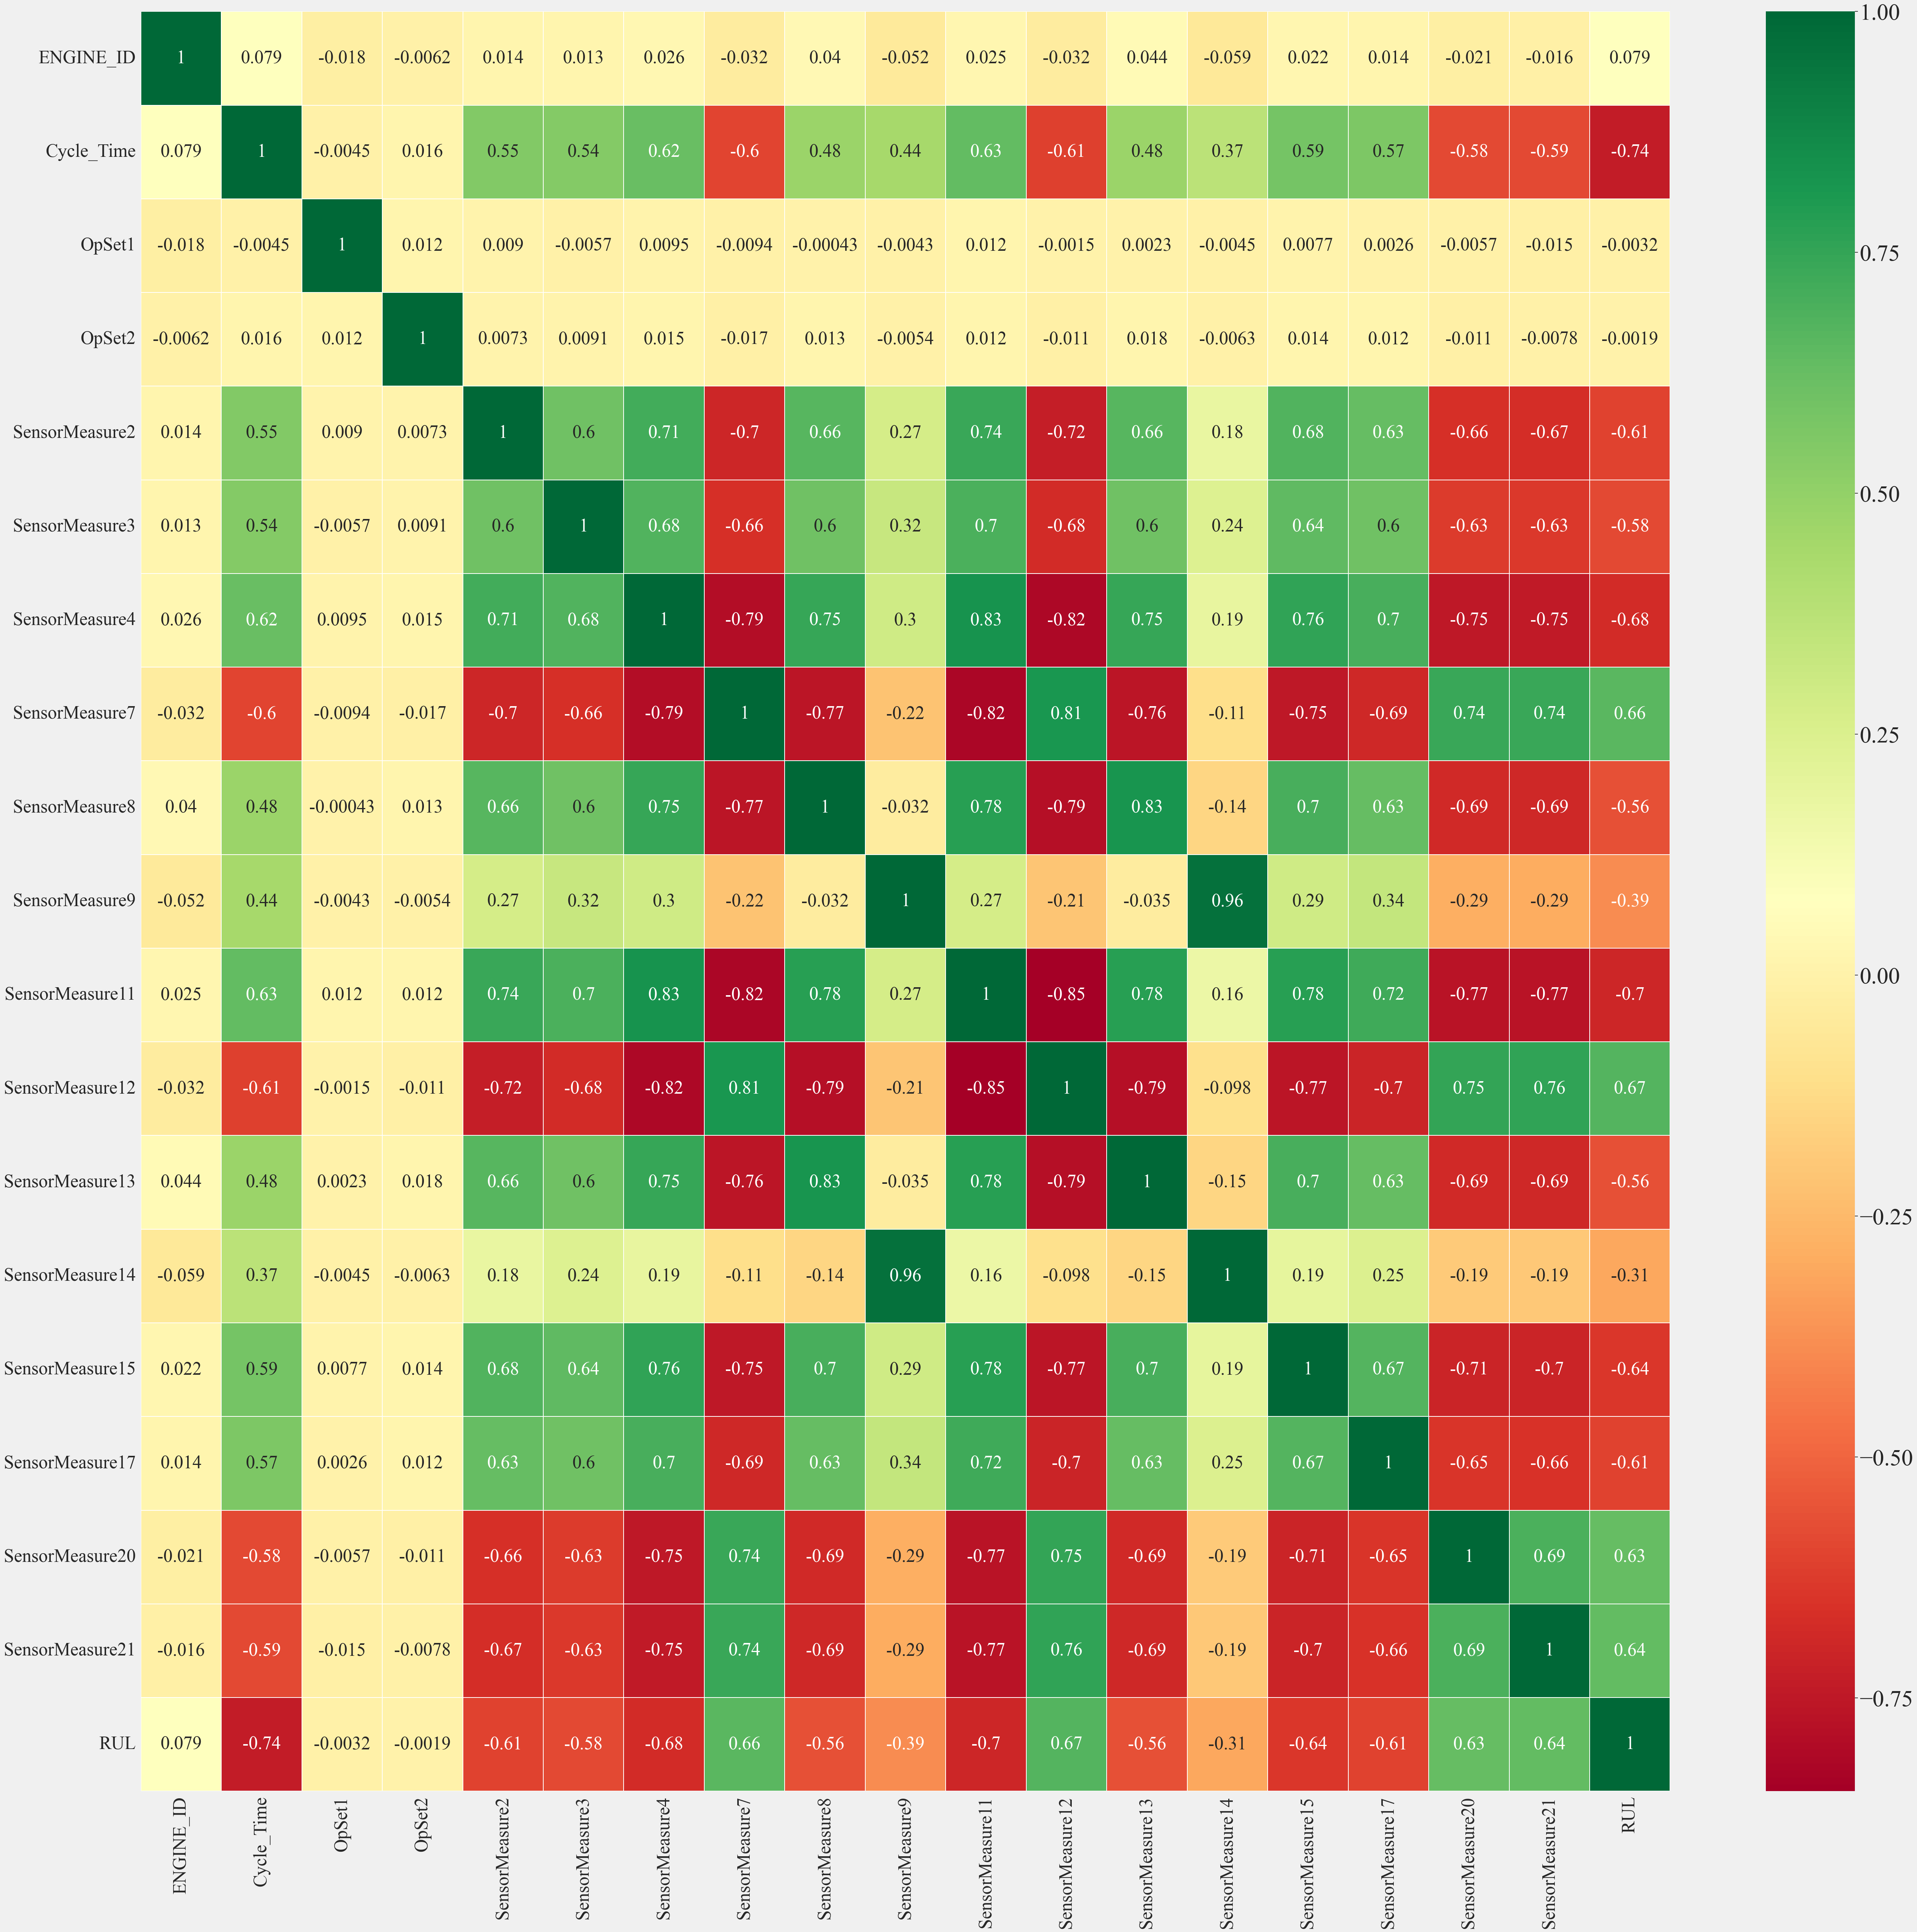

In [46]:
#Correlation heat Map
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
#plt.savefig('Corrplot.png',bbox_inches='tight')
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
#plt.savefig(r'C:\Users\mohan\Desktop\Mtech_project\Plot_images\Corrplot.svg',format='svg')

In [47]:
#Find columns which have Correlation less than 0.2 with RUL
delete_columns=[]
corr_value=0.2

for col in raw_data.columns:
    corr = raw_data[col].corr(raw_data['RUL'])
    #print(col,corr)
    if abs(corr)>corr_value:
        pass
    else:    
        delete_columns.append(col)
        
delete_columns 

['ENGINE_ID', 'OpSet1', 'OpSet2']

[Text(0, 0.5, 'Cycle_Time'),
 Text(0, 1.5, 'SensorMeasure2'),
 Text(0, 2.5, 'SensorMeasure3'),
 Text(0, 3.5, 'SensorMeasure4'),
 Text(0, 4.5, 'SensorMeasure7'),
 Text(0, 5.5, 'SensorMeasure8'),
 Text(0, 6.5, 'SensorMeasure9'),
 Text(0, 7.5, 'SensorMeasure11'),
 Text(0, 8.5, 'SensorMeasure12'),
 Text(0, 9.5, 'SensorMeasure13'),
 Text(0, 10.5, 'SensorMeasure14'),
 Text(0, 11.5, 'SensorMeasure15'),
 Text(0, 12.5, 'SensorMeasure17'),
 Text(0, 13.5, 'SensorMeasure20'),
 Text(0, 14.5, 'SensorMeasure21'),
 Text(0, 15.5, 'RUL')]

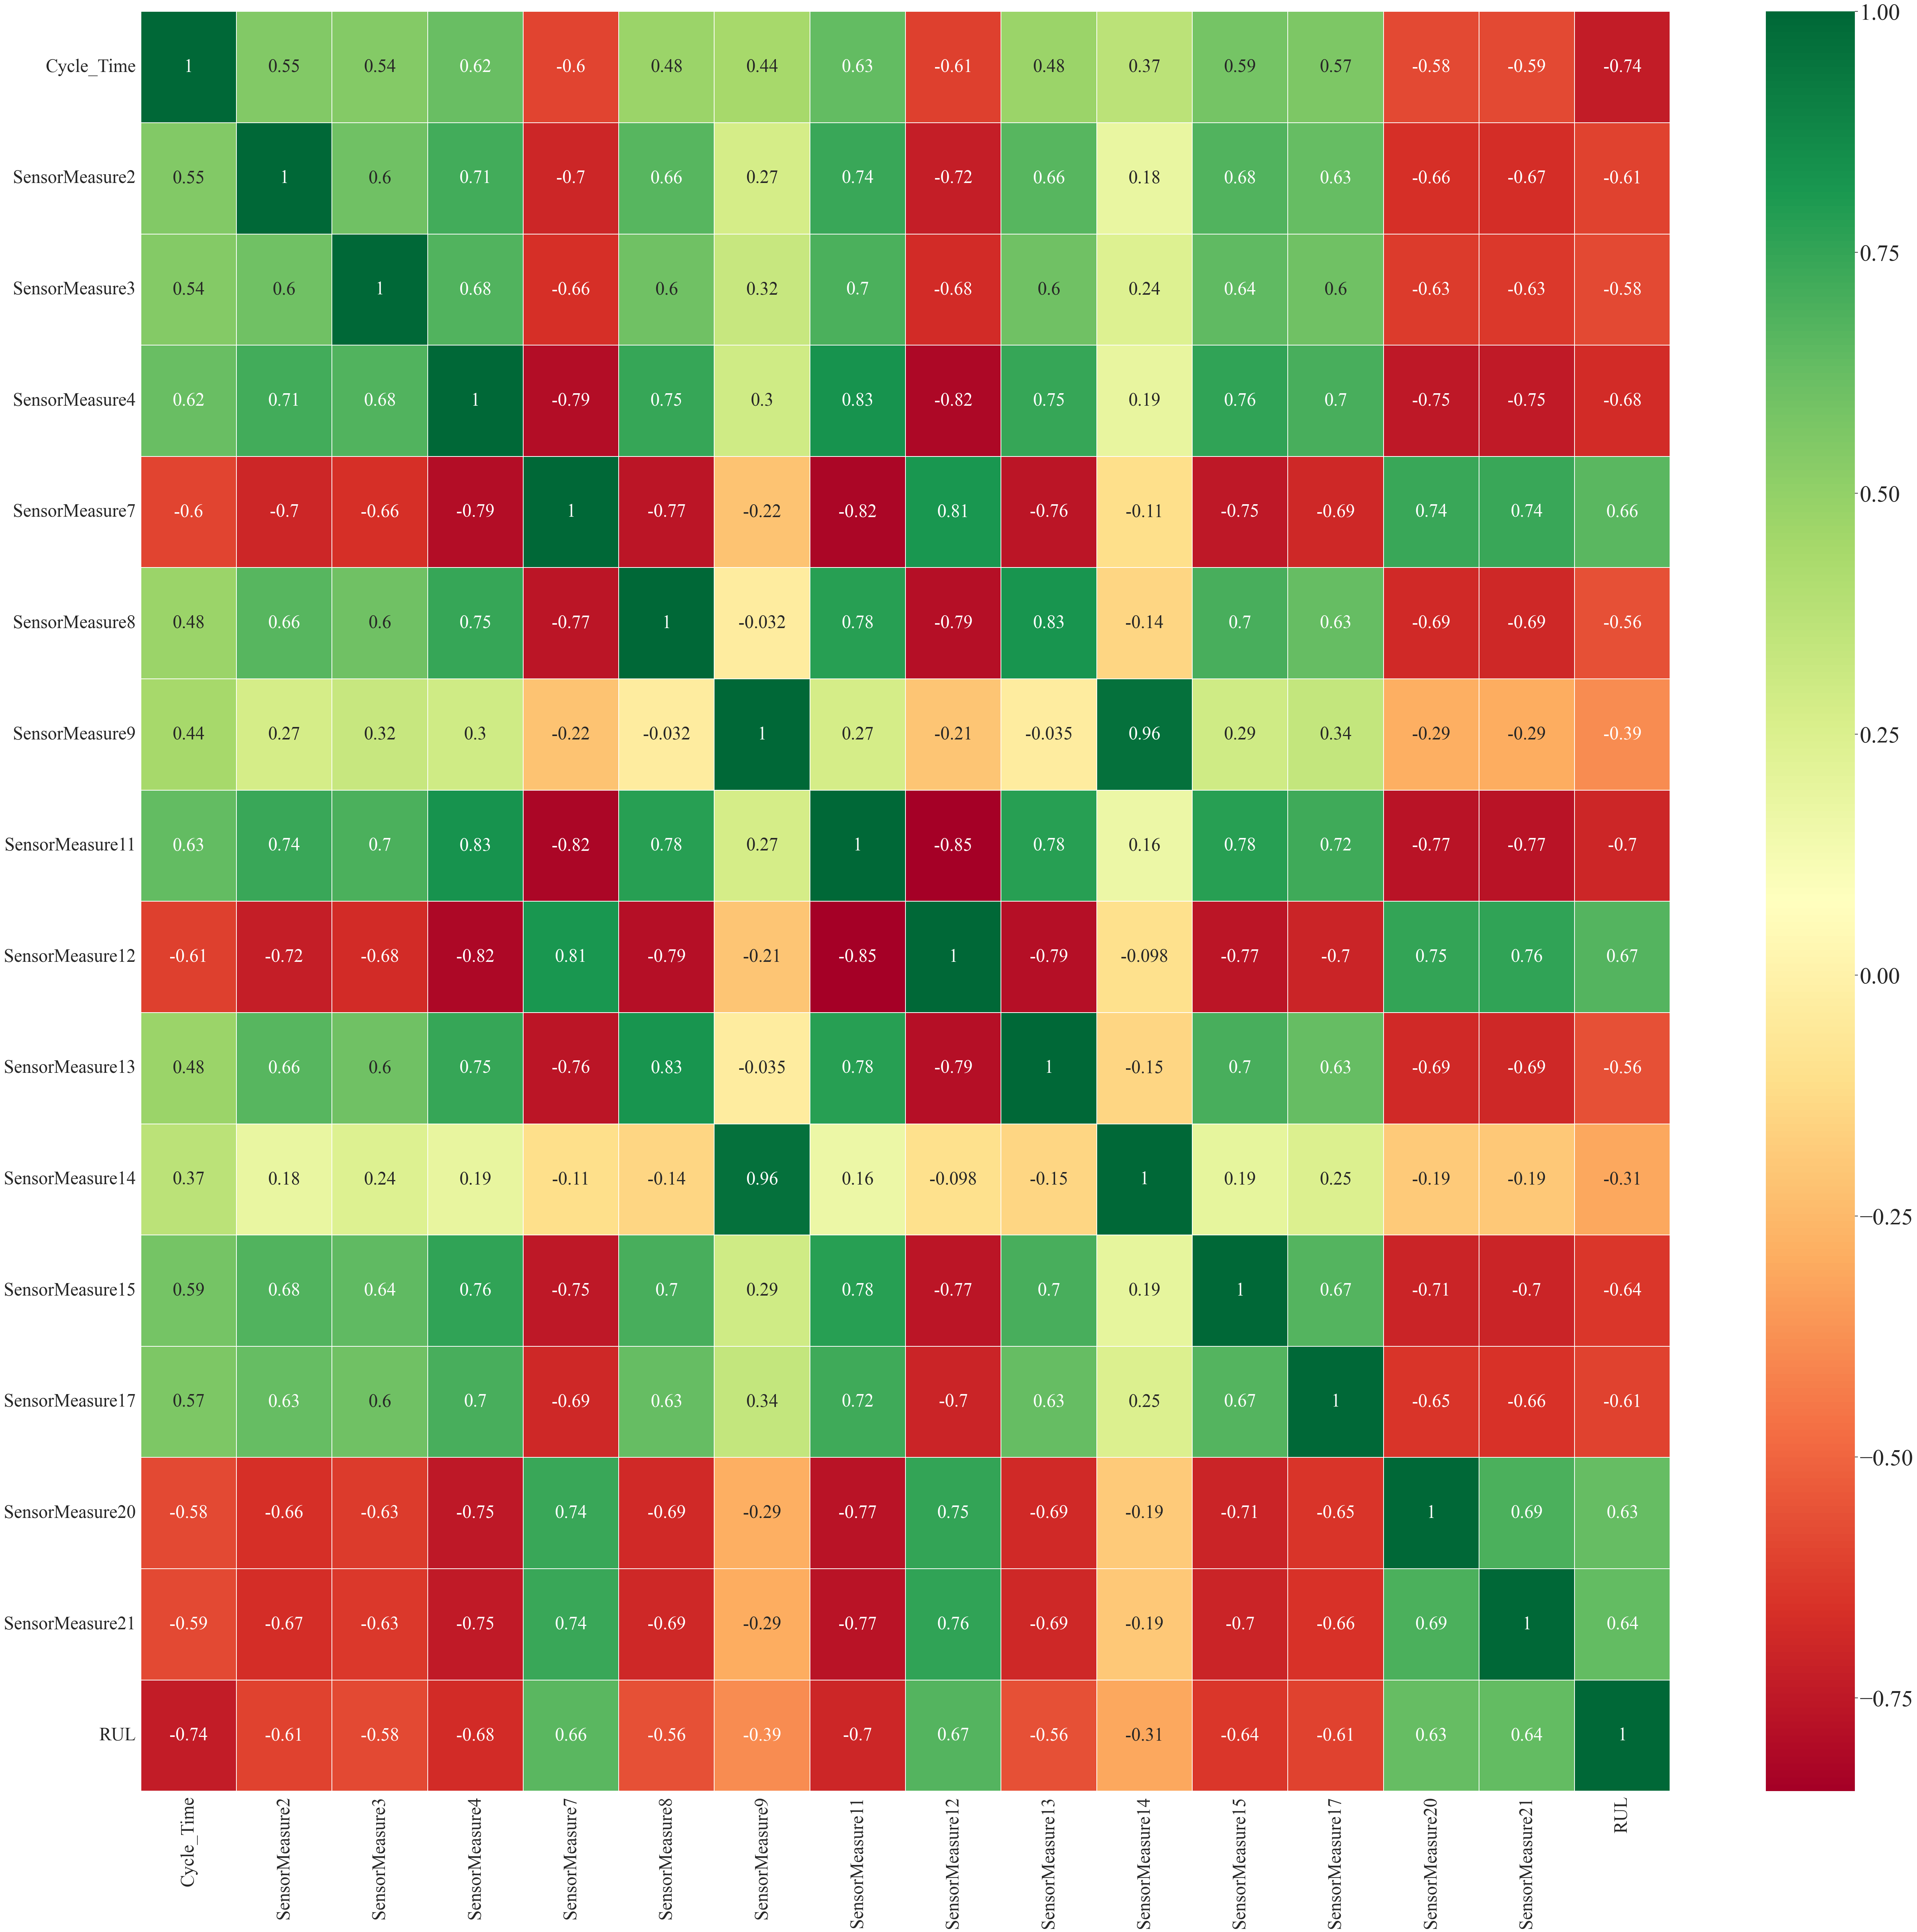

In [48]:
#Drop columns
raw_data=raw_data.drop(delete_columns,axis=1)

#New Correlation Map
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
#plt.savefig('Corrplot.png',bbox_inches='tight')
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
#plt.savefig(r'C:\Users\mohan\Desktop\Mtech_project\Plot_images\Corrplot.svg',format='svg')

In [49]:
#Feature importance selection using xgboost  (Which to use?)  ***** (ask on Monday)
X = raw_data.iloc[:, 0:13]
y = raw_data.iloc[:, 13]

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = DecisionTreeRegressor()
#model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)




[0.0366256  0.03060613 0.03157821 0.05821132 0.03926724 0.02224744
 0.02886821 0.58689262 0.06565016 0.02204004 0.02529783 0.04240473
 0.01031047]


<AxesSubplot:>

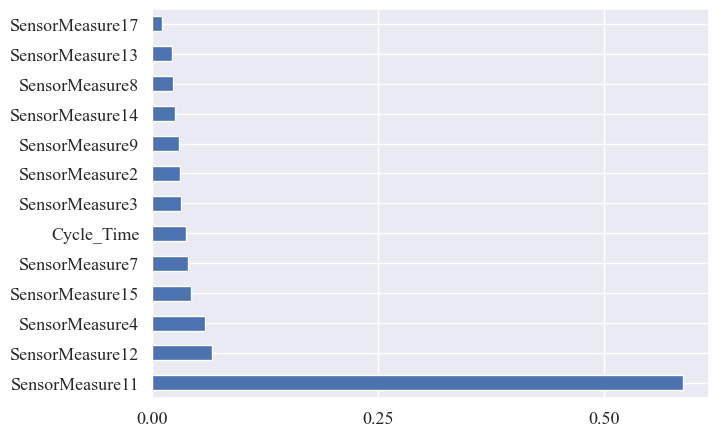

In [50]:
#Plot feature importances
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances=feat_importances.sort_values( ascending=False)
feat_importances.nlargest(13).plot(kind='barh',fontsize =13)

In [51]:
#RETURN FINAL FILE
